<a href="https://colab.research.google.com/github/Vimal9900/College-Work/blob/main/Geospatial_data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Reading dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Installing necessory library

In [ ]:
pip install geopandas

In [ ]:
!pip install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.7 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
import pandas as pd

municipality.json: It is taken from the Ministry of Federal Affairs and General Administration (MoFAGA) from Taplejung district data in Nepal.

In [ ]:
in_geojson = r"/content/drive/MyDrive/College-Work/municipality.json"


population.csv: Its is about the number of registered voters and total population in Nepal districts.

In [ ]:
df_population = pd.read_csv(r"/content/drive/MyDrive/College-Work/population.csv")
df_population.head()

,District,registered voters,Total population,Unnamed: 3,DIST UPPER
0,Achham,257477,127742,NaN,ACHHAM
1,Arghakhanchi,197632,126699,NaN,ARGHAKHANCHI
2,Baglung,268613,156802,NaN,BAGLUNG
3,Baitadi,250898,124824,NaN,BAITADI
4,Bajhang,195159,97610,NaN,BAJHANG


In [ ]:
df_population.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   District           75 non-null     object 
 1   registered voters  75 non-null     int64  
 2   Total population   75 non-null     int64  
 3   Unnamed: 3         0 non-null      float64
 4   DIST UPPER         75 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 3.1+ KB


In [ ]:
gdf = gpd.read_file(in_geojson)
gdf.head()

,OBJECTID,DISTRICT,GaPa_NaPa,Type_GN,Province,SCode,DCode,SDD,MCode,length,area,SDDMM,Nepali,Shape_Leng,Shape_Area,geometry
0,1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,1,1,1,101,1,44.672747,88.825948,10101,आठराई त्रिवेणी,0.430900,0.008075,"POLYGON ((87.62191 27.36245, 87.62137 27.36272..."
1,2,TAPLEJUNG,Maiwakhola,Gaunpalika,1,1,1,101,2,61.067429,137.848122,10102,मैवाखोला,0.577692,0.012540,"POLYGON ((87.60599 27.37125, 87.60364 27.37219..."
2,3,TAPLEJUNG,Meringden,Gaunpalika,1,1,1,101,3,75.987469,210.313039,10103,मेरिङदेन,0.718499,0.019148,"POLYGON ((87.62728 27.37689, 87.62691 27.37773..."
3,4,TAPLEJUNG,Mikwakhola,Gaunpalika,1,1,1,101,4,123.175400,442.960328,10104,मिक्वाखोला,1.164097,0.040365,"POLYGON ((87.68465 27.40857, 87.67857 27.40784..."
4,5,TAPLEJUNG,Phaktanglung,Gaunpalika,1,1,1,101,5,228.107830,1858.441119,10105,फक्ताङलुङ,2.186142,0.169452,"POLYGON ((88.14827 27.70202, 88.14733 27.70302..."


## 2. Spatial Visualization and Exploration:

In [ ]:
gdf.describe()

,OBJECTID,SCode,DCode,SDD,MCode,length,area,SDDMM,Shape_Leng,Shape_Area
count,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000
mean,387.500000,3.651163,36.815245,401.931525,8.436693,75.003037,191.401939,40201.589147,0.720249,0.017588
std,223.578845,2.003171,22.049591,221.431259,14.796262,39.779379,253.638512,22143.022630,0.384657,0.023483
min,1.000000,1.000000,1.000000,101.000000,1.000000,11.054486,1.336874,10101.000000,0.104763,0.000122
25%,194.250000,2.000000,18.000000,218.000000,3.000000,50.898941,76.867367,21801.250000,0.488571,0.006980
50%,387.500000,3.000000,34.000000,331.000000,6.000000,65.753944,123.171074,33105.500000,0.631270,0.011326
75%,580.750000,5.000000,56.000000,556.000000,9.000000,85.351253,199.828511,55609.750000,0.820321,0.018407
max,774.000000,7.000000,77.000000,775.000000,99.000000,310.307817,2453.885882,77509.000000,3.004550,0.228039


In [ ]:
df_population.describe()

,registered voters,Total population,Unnamed: 3
count,7.500000e+01,75.000000,0.0
mean,3.532601e+05,187393.093333,NaN
std,2.837822e+05,130242.280091,NaN
min,6.538000e+03,5095.000000,NaN
25%,1.655680e+05,97133.500000,NaN
50%,2.686130e+05,161529.000000,NaN
75%,4.917055e+05,249631.500000,NaN
max,1.744240e+06,563870.000000,NaN


In [ ]:
df_population.drop(columns = "Unnamed: 3", inplace = True)

In [ ]:
df_population.drop(columns = "District", inplace = True)

In [ ]:
print(len(gdf),len(df_population))

774 75


In [ ]:
gdf.shape

(774, 16)

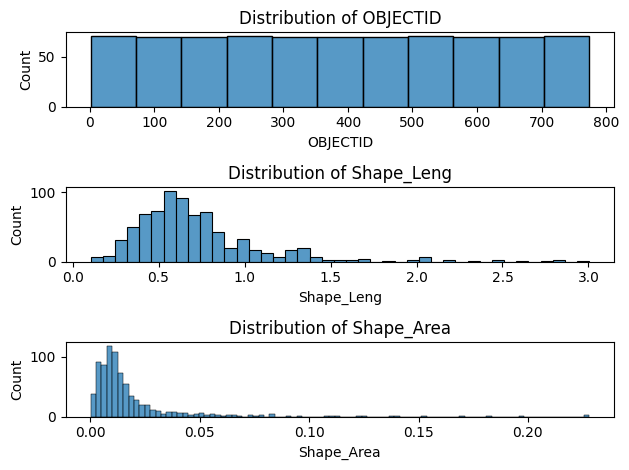

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


columns_to_plot = ['OBJECTID', 'Shape_Leng', 'Shape_Area']

fig, axes = plt.subplots(len(columns_to_plot), 1)

for i, column in enumerate(columns_to_plot):
  sns.histplot(data=gdf, x=column, ax=axes[i])
  axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [ ]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
#To check the geometry type of the GeoDataFrame
gdf.geom_type

,0
0,Polygon
1,Polygon
2,Polygon
3,Polygon
4,Polygon
...,...
769,Polygon
770,Polygon
771,Polygon
772,Polygon


Choropleth maps are created to visualize the distribution of 'Province' and 'DISTRICT' attributes with varying color shades representing different values

<Axes: >

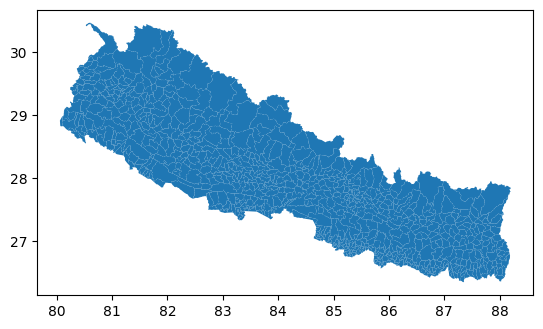

In [ ]:
gdf.plot()

<Axes: >

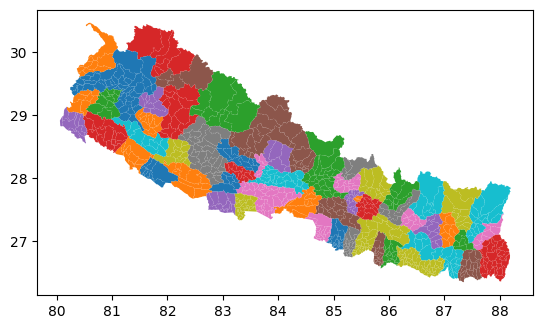

In [ ]:
gdf.plot("DISTRICT")

In [ ]:
gdf.head()

,OBJECTID,DISTRICT,GaPa_NaPa,Type_GN,Province,SCode,DCode,SDD,MCode,length,area,SDDMM,Nepali,Shape_Leng,Shape_Area,geometry
0,1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,1,1,1,101,1,44.672747,88.825948,10101,आठराई त्रिवेणी,0.430900,0.008075,"POLYGON ((87.62191 27.36245, 87.62137 27.36272..."
1,2,TAPLEJUNG,Maiwakhola,Gaunpalika,1,1,1,101,2,61.067429,137.848122,10102,मैवाखोला,0.577692,0.012540,"POLYGON ((87.60599 27.37125, 87.60364 27.37219..."
2,3,TAPLEJUNG,Meringden,Gaunpalika,1,1,1,101,3,75.987469,210.313039,10103,मेरिङदेन,0.718499,0.019148,"POLYGON ((87.62728 27.37689, 87.62691 27.37773..."
3,4,TAPLEJUNG,Mikwakhola,Gaunpalika,1,1,1,101,4,123.175400,442.960328,10104,मिक्वाखोला,1.164097,0.040365,"POLYGON ((87.68465 27.40857, 87.67857 27.40784..."
4,5,TAPLEJUNG,Phaktanglung,Gaunpalika,1,1,1,101,5,228.107830,1858.441119,10105,फक्ताङलुङ,2.186142,0.169452,"POLYGON ((88.14827 27.70202, 88.14733 27.70302..."


<Axes: >

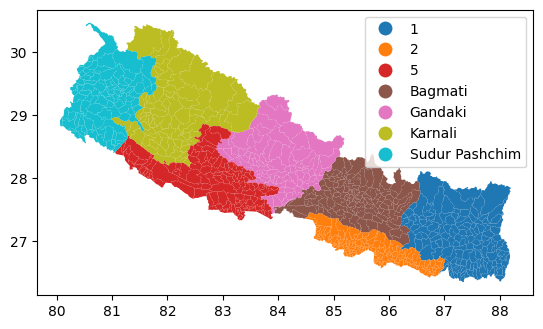

In [ ]:
gdf.plot('Province', legend = True)

In [ ]:
import matplotlib.pyplot as plt

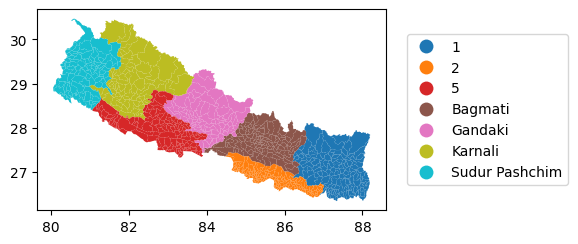

In [ ]:
fig, ax = plt.subplots(1, figsize=(4.5, 10))
gdf.plot(ax=ax, column = 'Province', legend = True, legend_kwds = {'loc':'center left'})
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.04,0.5))

In [ ]:
gdf.to_file(r"/content/drive/MyDrive/College-Work/output/out_shp.shp")

In [ ]:
gdf.to_file(r"/content/drive/MyDrive/College-Work/output/out_geojson.geojson", driver = "GeoJSON", encoding = "utf-8")

In [ ]:
gdf['Province'] =="1"

,Province
0,True
1,True
2,True
3,True
4,True
...,...
769,False
770,False
771,False
772,False


In [ ]:
prov_1 = gdf[gdf['Province'] =="1"]
prov_1.head()


,OBJECTID,DISTRICT,GaPa_NaPa,Type_GN,Province,SCode,DCode,SDD,MCode,length,area,SDDMM,Nepali,Shape_Leng,Shape_Area,geometry
0,1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,1,1,1,101,1,44.672747,88.825948,10101,आठराई त्रिवेणी,0.430900,0.008075,"POLYGON ((87.62191 27.36245, 87.62137 27.36272..."
1,2,TAPLEJUNG,Maiwakhola,Gaunpalika,1,1,1,101,2,61.067429,137.848122,10102,मैवाखोला,0.577692,0.012540,"POLYGON ((87.60599 27.37125, 87.60364 27.37219..."
2,3,TAPLEJUNG,Meringden,Gaunpalika,1,1,1,101,3,75.987469,210.313039,10103,मेरिङदेन,0.718499,0.019148,"POLYGON ((87.62728 27.37689, 87.62691 27.37773..."
3,4,TAPLEJUNG,Mikwakhola,Gaunpalika,1,1,1,101,4,123.175400,442.960328,10104,मिक्वाखोला,1.164097,0.040365,"POLYGON ((87.68465 27.40857, 87.67857 27.40784..."
4,5,TAPLEJUNG,Phaktanglung,Gaunpalika,1,1,1,101,5,228.107830,1858.441119,10105,फक्ताङलुङ,2.186142,0.169452,"POLYGON ((88.14827 27.70202, 88.14733 27.70302..."


<Axes: >

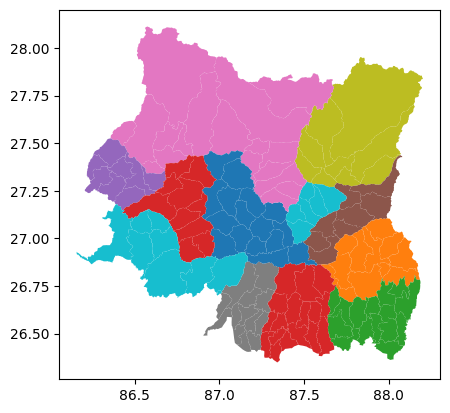

In [ ]:
prov_1.plot("DISTRICT")

<Axes: >

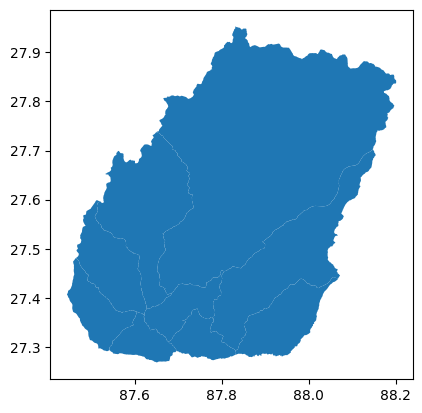

In [ ]:
dist = gdf[gdf["DISTRICT"]=="TAPLEJUNG"]
dist.plot()

<Axes: >

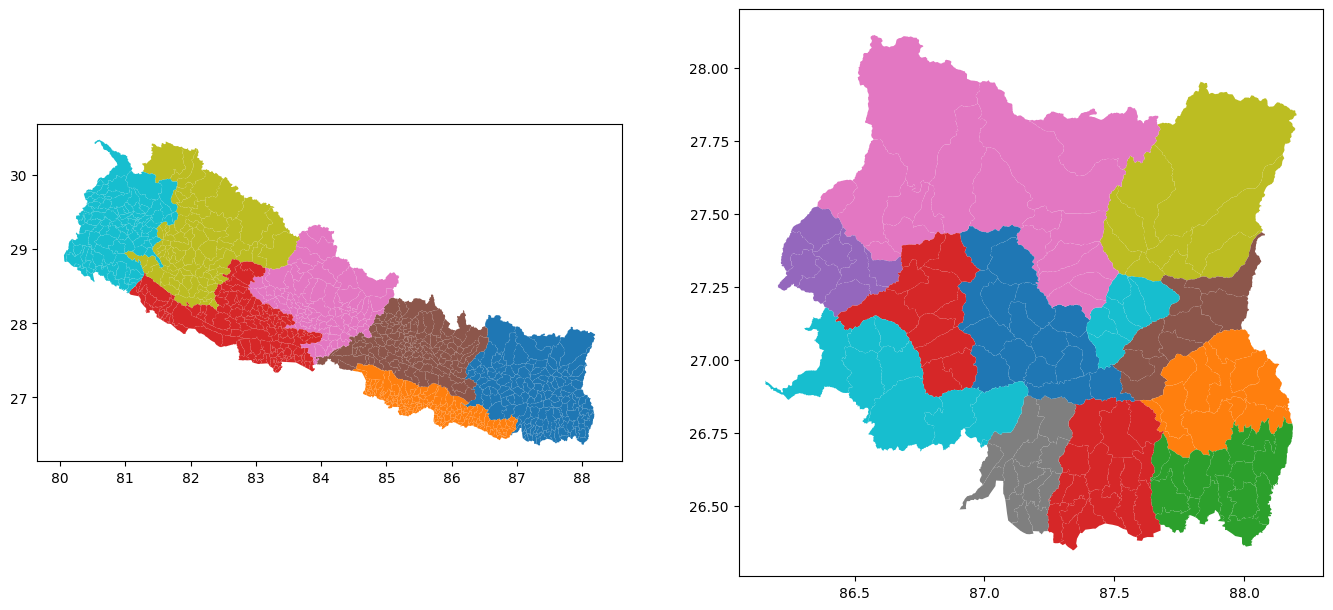

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (16.59,11.69))
gdf.plot(ax=ax1, column = "Province")
prov_1.plot(ax = ax2, column = "DISTRICT")

## 3. Area Analysis

In [ ]:
gdf_copy = gdf.copy()
gdf_copy = gdf_copy.to_crs(epsg = 32645)
gdf_copy["Areas"] = gdf_copy.geometry.area / 10**6
gdf_copy.head()

,OBJECTID,DISTRICT,GaPa_NaPa,Type_GN,Province,SCode,DCode,SDD,MCode,length,area,SDDMM,Nepali,Shape_Leng,Shape_Area,geometry,Areas
0,1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,1,1,1,101,1,44.672747,88.825948,10101,आठराई त्रिवेणी,0.430900,0.008075,"POLYGON ((561504.353 3026734.839, 561451.43 30...",88.500797
1,2,TAPLEJUNG,Maiwakhola,Gaunpalika,1,1,1,101,2,61.067429,137.848122,10102,मैवाखोला,0.577692,0.012540,"POLYGON ((559925.377 3027701.299, 559692.385 3...",137.365137
2,3,TAPLEJUNG,Meringden,Gaunpalika,1,1,1,101,3,75.987469,210.313039,10103,मेरिङदेन,0.718499,0.019148,"POLYGON ((562027.759 3028336.866, 561990.273 3...",209.567544
3,4,TAPLEJUNG,Mikwakhola,Gaunpalika,1,1,1,101,4,123.175400,442.960328,10104,मिक्वाखोला,1.164097,0.040365,"POLYGON ((567681.657 3031875.576, 567080.645 3...",441.340234
4,5,TAPLEJUNG,Phaktanglung,Gaunpalika,1,1,1,101,5,228.107830,1858.441119,10105,फक्ताङलुङ,2.186142,0.169452,"POLYGON ((613214.26 3064721.41, 613120.224 306...",1850.938265


<Axes: >

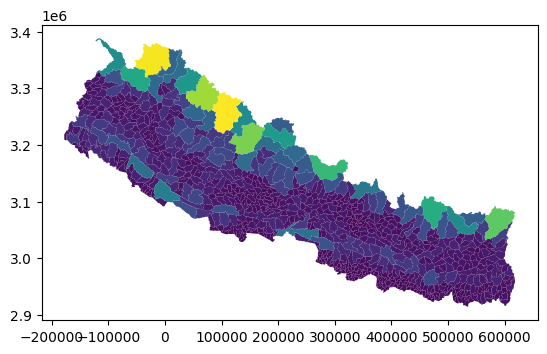

In [ ]:
gdf_copy.plot('Areas')

In [ ]:
gdf_area_filter = gdf[gdf_copy['Areas']>200]

<Axes: >

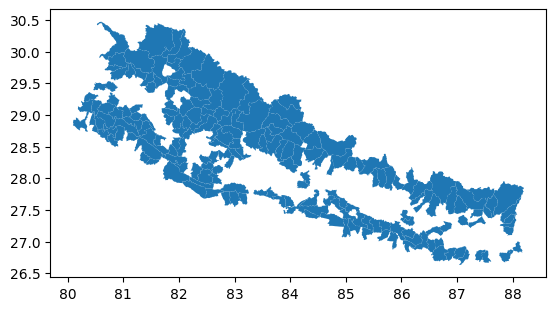

In [ ]:
gdf_area_filter.plot()

## 4. Working with geometry(Shapely)

In [ ]:
from shapely.geometry import Polygon, LineString, Point

In [ ]:
from shapely.geometry import Polygon, LineString, Point
import geopandas as gpd #Import the geopandas module

p1 = Point(85,30)
p2 = Point(80,25)
l1 = LineString([p1,p2])
pol1 = Polygon([(82,25),(83,26),(82,23)])
pol1

geoseries_shapely = gpd.GeoSeries([p1,p2,l1,pol1])
df_shapely = gpd.GeoDataFrame(geoseries_shapely)
df_shapely.columns = ['geometry']
df_shapely = df_shapely.set_geometry('geometry') #Set the 'geometry' column as the active geometry column.
df_shapely.crs = "EPSG:4326"
df_shapely

,geometry
0,POINT (85 30)
1,POINT (80 25)
2,"LINESTRING (85 30, 80 25)"
3,"POLYGON ((82 25, 83 26, 82 23, 82 25))"


<Axes: >

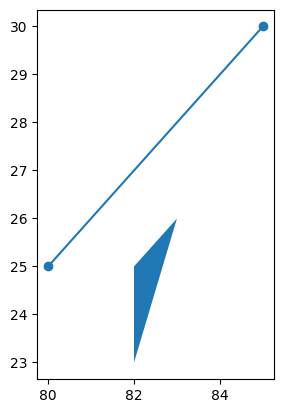

In [ ]:
df_shapely.plot()

In [ ]:
df_shapely.to_file(r'/content/drive/MyDrive/College-Work/output/shapely.geojson', driver = 'GeoJSON')

In [ ]:
gdf_filter = gdf_copy[['DISTRICT','area','geometry']]
gdf_district = gdf_filter.dissolve(by='DISTRICT', aggfunc ='sum')
gdf_district.head()

,geometry,area
DISTRICT,,
ACHHAM,"POLYGON ((-56423.948 3213010.677, -56653.749 3...",1702.637898
ARGHAKHANCHI,"POLYGON ((128933.734 3083208.219, 129278.798 3...",1239.136272
BAGLUNG,"POLYGON ((134739.767 3123827.977, 134575.752 3...",1835.764027
BAITADI,"POLYGON ((-144618.018 3264503.806, -144754.203...",1496.337038
BAJHANG,"POLYGON ((-60647.761 3267497.297, -60874.41 32...",3464.331494


In [ ]:
len(gdf_district)

77

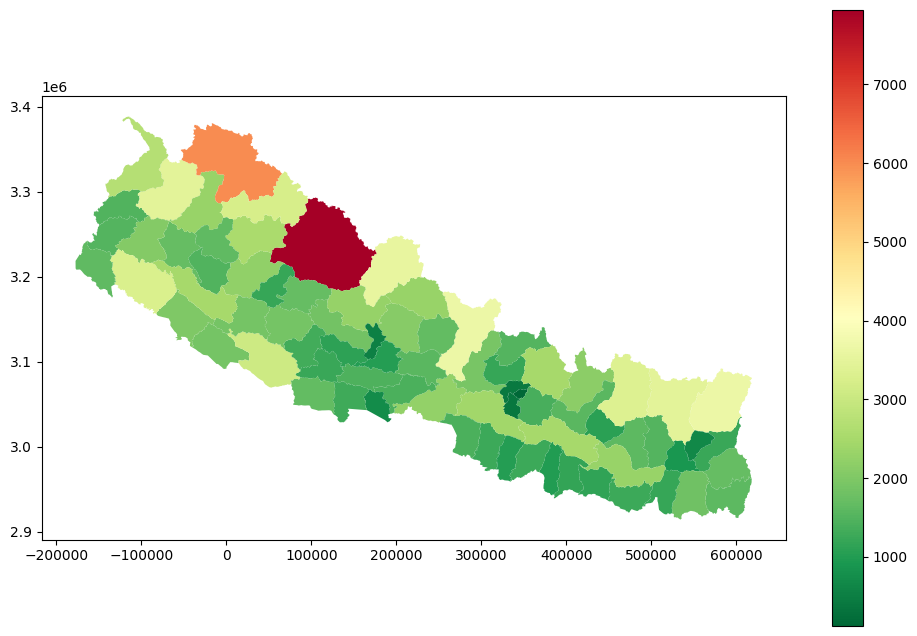

In [ ]:
fig, ax = plt.subplots(1, figsize=(12, 8))
gdf_district.plot('area', cmap='RdYlGn_r', legend=True, ax=ax)
plt.show()


In [ ]:
gdf_district.to_file(r'/content/drive/MyDrive/College-Work/output/districtdissolve.geojson', driver = 'GeoJSON')

In [ ]:
district_dissolved = r"/content/drive/MyDrive/College-Work/output/districtdissolve.geojson"

In [ ]:
district= gpd.read_file(district_dissolved)

<Axes: >

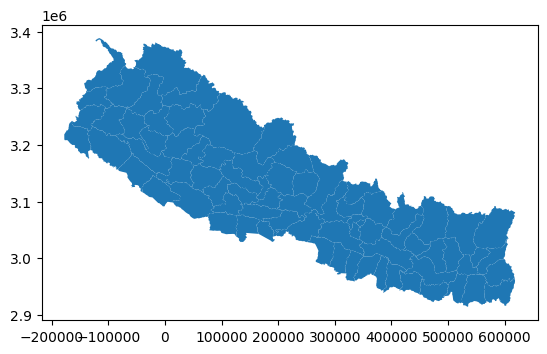

In [ ]:
district.plot()

In [ ]:
import pandas as pd
gdf = gpd.read_file('/content/drive/MyDrive/College-Work/output/districtdissolve.geojson')

In [ ]:
gdf.head()

,DISTRICT,area,geometry
0,ACHHAM,1702.637898,"POLYGON ((-56423.948 3213010.677, -56653.749 3..."
1,ARGHAKHANCHI,1239.136272,"POLYGON ((128933.734 3083208.219, 129278.798 3..."
2,BAGLUNG,1835.764027,"POLYGON ((134739.767 3123827.977, 134575.752 3..."
3,BAITADI,1496.337038,"POLYGON ((-144618.018 3264503.806, -144754.203..."
4,BAJHANG,3464.331494,"POLYGON ((-60647.761 3267497.297, -60874.41 32..."


## 5. Population Analysis

Merging Population dataset with gdf data so make analysis on voting percentage and the population

In [ ]:
gdf_population = gdf.merge(df_population, how = 'left', left_on = 'DISTRICT', right_on = "DIST UPPER")
gdf_population.head()

,DISTRICT,area,geometry,registered voters,Total population,DIST UPPER
0,ACHHAM,1702.637898,"POLYGON ((-56423.948 3213010.677, -56653.749 3...",257477.0,127742.0,ACHHAM
1,ARGHAKHANCHI,1239.136272,"POLYGON ((128933.734 3083208.219, 129278.798 3...",197632.0,126699.0,ARGHAKHANCHI
2,BAGLUNG,1835.764027,"POLYGON ((134739.767 3123827.977, 134575.752 3...",268613.0,156802.0,BAGLUNG
3,BAITADI,1496.337038,"POLYGON ((-144618.018 3264503.806, -144754.203...",250898.0,124824.0,BAITADI
4,BAJHANG,3464.331494,"POLYGON ((-60647.761 3267497.297, -60874.41 32...",195159.0,97610.0,BAJHANG


In [ ]:
gdf_population = gdf_population[['DISTRICT','area','geometry','Total population']]
gdf_population.head()

,DISTRICT,area,geometry,Total population
0,ACHHAM,1702.637898,"POLYGON ((-56423.948 3213010.677, -56653.749 3...",127742.0
1,ARGHAKHANCHI,1239.136272,"POLYGON ((128933.734 3083208.219, 129278.798 3...",126699.0
2,BAGLUNG,1835.764027,"POLYGON ((134739.767 3123827.977, 134575.752 3...",156802.0
3,BAITADI,1496.337038,"POLYGON ((-144618.018 3264503.806, -144754.203...",124824.0
4,BAJHANG,3464.331494,"POLYGON ((-60647.761 3267497.297, -60874.41 32...",97610.0


In [ ]:
null_val = gdf_population[gdf_population['Total population'].isnull()]
null_val

,DISTRICT,area,geometry,Total population
46,NAWALPARASI_E,1425.901299,"POLYGON ((197076.324 3040128.155, 196864.196 3...",NaN
47,NAWALPARASI_W,726.080254,"POLYGON ((191430.018 3046740.65, 191629.114 30...",NaN
59,RUKUM_E,1682.272672,"POLYGON ((96578.54 3160972.089, 96779.554 3160...",NaN
60,RUKUM_W,1213.453408,"POLYGON ((60093.236 3179036.997, 60009.324 317...",NaN


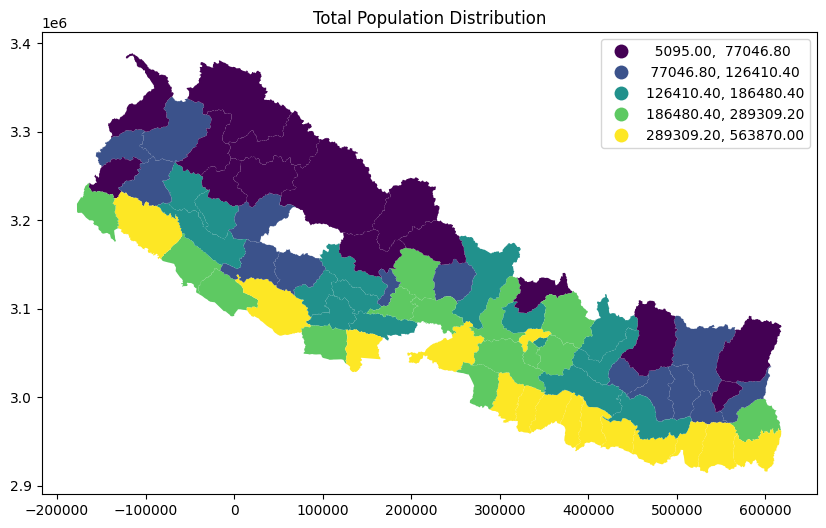

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(10, 6))
gdf_population.plot(column='Total population', cmap='viridis', legend=True, ax=ax, scheme='quantiles', k=5)

ax.set_title('Total Population Distribution')
plt.show()

## 6. Relationships Between Area and Population

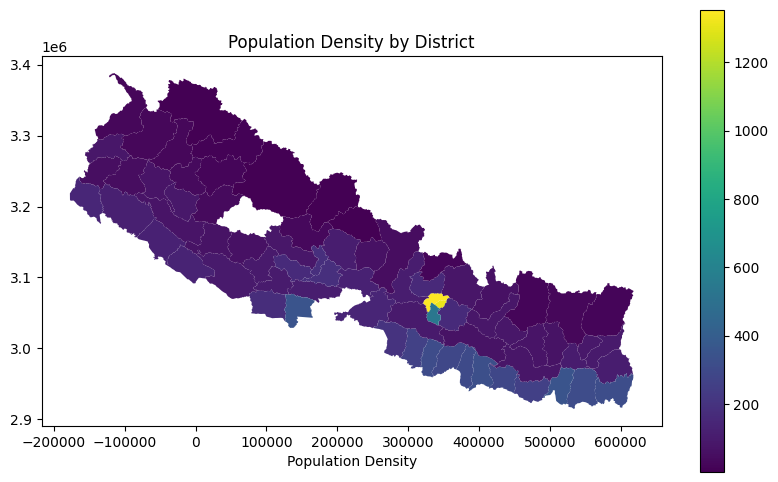

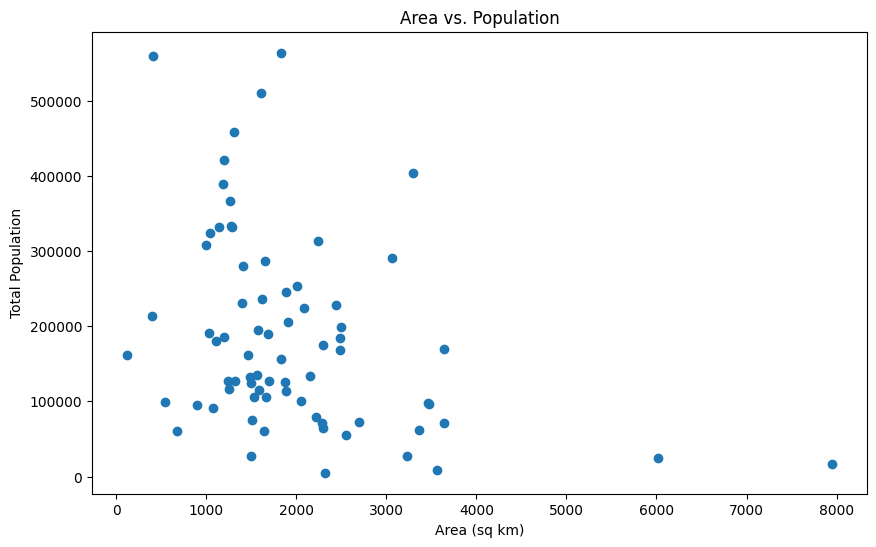

Average population density: 155.65273678564878
District with the highest population density: KATHMANDU
District with the lowest population density: DOLPA


In [ ]:
# Calculate population density
gdf_population['Population Density'] = gdf_population['Total population'] / gdf_population['area']

# Plot population density

gdf_population.plot('Population Density', legend=True, cmap='viridis', figsize=(10, 6))
plt.xlabel('Population Density')
plt.title('Population Density by District')
plt.show()


# Analyze the relationship between area and population
plt.figure(figsize=(10, 6))
plt.scatter(gdf_population['area'], gdf_population['Total population'])
plt.xlabel('Area (sq km)')
plt.ylabel('Total Population')
plt.title('Area vs. Population')
plt.show()


# Calculate the average population density
average_density = gdf_population['Population Density'].mean()
print(f"Average population density: {average_density}")

# Find the district with the highest population density
highest_density_district = gdf_population.loc[gdf_population['Population Density'].idxmax()]
print(f"District with the highest population density: {highest_density_district['DISTRICT']}")


# Find the district with the lowest population density
lowest_density_district = gdf_population.loc[gdf_population['Population Density'].idxmin()]
print(f"District with the lowest population density: {lowest_density_district['DISTRICT']}")


DISTRICT
ACHHAM          257477.0
ARGHAKHANCHI    197632.0
BAGLUNG         268613.0
BAITADI         250898.0
BAJHANG         195159.0
                  ...   
SYANGJA         289148.0
TANAHU          323288.0
TAPLEJUNG       127461.0
TERHATHUM       101577.0
UDAYAPUR        317532.0
Name: registered voters, Length: 77, dtype: float64
DISTRICT
ACHHAM          1.895631
ARGHAKHANCHI    1.455032
BAGLUNG         1.977618
BAITADI         1.847194
BAJHANG         1.436825
                  ...   
SYANGJA         2.128803
TANAHU          2.380153
TAPLEJUNG       0.938410
TERHATHUM       0.747843
UDAYAPUR        2.337775
Name: registered voters, Length: 77, dtype: float64


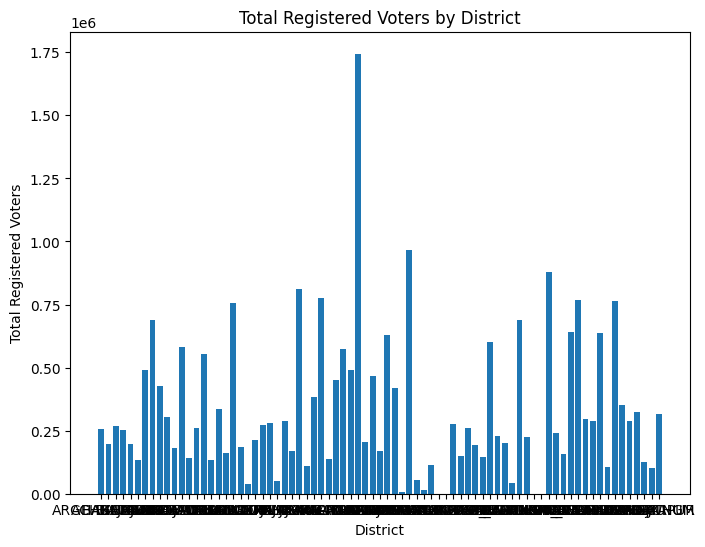

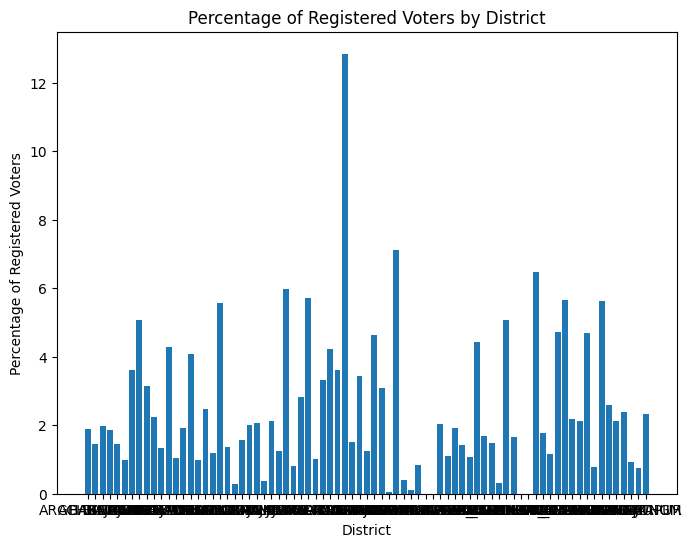

In [ ]:
import pandas as pd


merged_dataset = gdf.merge(df_population, how = 'left', left_on = 'DISTRICT', right_on = "DIST UPPER")

# Calculate the total number of registered voters in each district
registered_voters_by_district = merged_dataset.groupby('DISTRICT')['registered voters'].sum()
print(registered_voters_by_district)

# Calculate the percentage of registered voters in each district
percentage_registered_voters = (registered_voters_by_district / merged_dataset['Total population'].sum()) * 100
print(percentage_registered_voters)

# Plot the total number of registered voters in each district
plt.figure(figsize=(8,6))
plt.bar(registered_voters_by_district.index, registered_voters_by_district.values)
plt.xlabel('District')
plt.ylabel('Total Registered Voters')
plt.title('Total Registered Voters by District')
plt.show()

# Plot the percentage of registered voters in each district
plt.figure(figsize=(8,6))
plt.bar(percentage_registered_voters.index, percentage_registered_voters.values)
plt.xlabel('District')
plt.ylabel('Percentage of Registered Voters')
plt.title('Percentage of Registered Voters by District')
plt.show()

## 7. K-means clustering

Correlation between population density and area: -0.45400689496581903


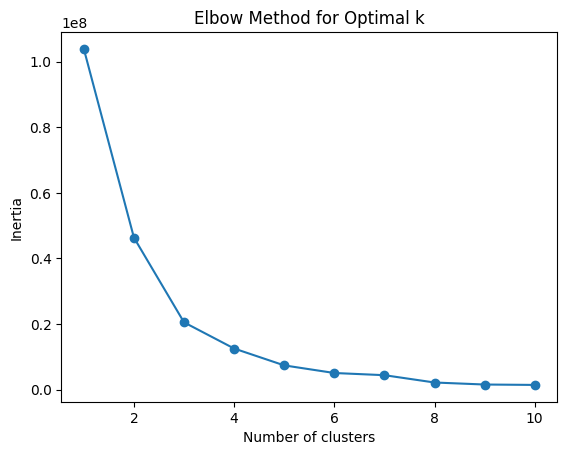

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


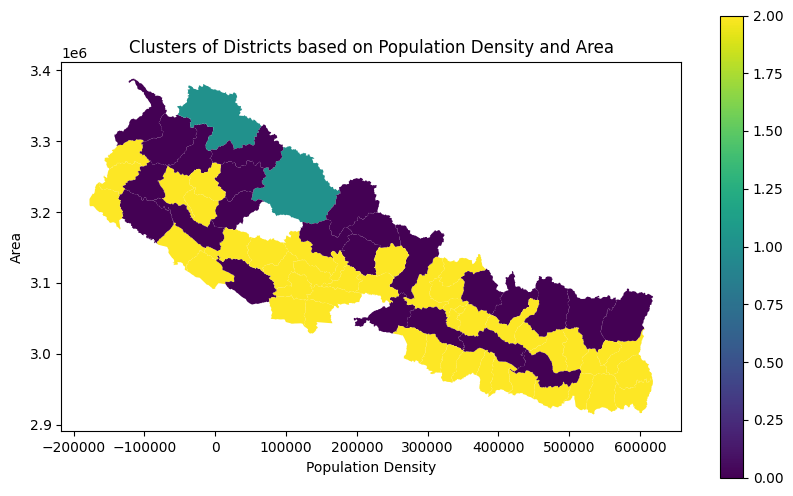

In [ ]:
# Correlation between population density and area
correlation = gdf_population['Population Density'].corr(gdf_population['area'])
print(f"Correlation between population density and area: {correlation}")

# Clustering districts based on population density and area
from sklearn.cluster import KMeans

# Select relevant features for clustering
X = gdf_population[['Population Density', 'area']]

# Drop rows with missing values (NaN) in the selected features
X = X.dropna()

# Determine the optimal number of clusters using the elbow method (you can adjust the range)
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Based on the elbow curve, choose the optimal number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# Create a new GeoDataFrame with the clustered data
clustered_gdf = gdf_population.dropna(subset=['Population Density', 'area'])
clustered_gdf['Cluster'] = kmeans.labels_

# Plot the clusters using the clustered GeoDataFrame
clustered_gdf.plot('Cluster', legend=True, cmap='viridis', figsize=(10, 6))
plt.xlabel('Population Density')
plt.ylabel('Area')
plt.title('Clusters of Districts based on Population Density and Area')
plt.show()


**1. Understand Population Distribution Patterns:**
    K-means helps to group districts with similar population densities and areas, allowing for
    identification of regions with high or low population densities, as well as larger or smaller geographical areas. This can provide valuable insights into the spatial distribution of population.

**2. Identify Clusters of Districts:**
    By clustering districts based on population density and area, you can discover clusters of
    districts that share similar characteristics. This can be used to develop targeted strategies
    or policies for specific groups of districts.


 **The insights gained from K-means clustering can be valuable for decision-makers in understanding population distribution and formulating effective policies and interventions related to urban planning, resource allocation, and social development.**